Paso 1: Definir el contexto del problema

*  Primero, entenderemos que se tienen 5 imágenes y el objetivo es encontrar la que maximice el número de clics en el banner.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tenemos 5 imágenes, a cada imagen se le asignará una tasa de clics.
# Esto representará el comportamiento real de los usuarios en cuanto a qué imagen prefieren.

conversion_rates = [0.05, 0.1, 0.12, 0.08, 0.15]  # tasas de conversión(tasa de clicks) simuladas para cada imagen
n_images = len(conversion_rates)
n_impressions = 1000  # número de impresiones (número de juegos)

np.random.seed(42)

Paso 2: Modificar la función del bandido multibrazo


*  Implementaremos el método del bandido multibrazo para explorar diferentes imágenes con un balance entre exploración (probar imágenes nuevas) y explotación (usar las imágenes que han demostrado ser mejores).

*   Epsilon controla el balance si tenemos un valor epsilon bajo entonces promueve la explotacion que consistiria en usar la imagen con mejor desempeño, sin embargo si epsilon es alto entonces llevamos a cabo exploración donde probaría otras imagenes mas frecuentemente.


In [3]:
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    """
    Simula el problema del bandido multibrazo para 5 imágenes con tasas de conversión desconocidas.
    :param num_games: número de impresiones (número de iteraciones)
    :param epsilon: ratio de exploración/explotación (0.1 significaría 10% de exploración, 90% de explotación)
    :param verbose: Si True, imprime resultados intermedios
    :return: Q_values: lista con el valor de Q (clics/impresiones) de cada imagen
             clicks_per_image: número total de clics por imagen
    """

    n_images = 5  # número de imágenes
    clicks_per_image = np.zeros(n_images)  # clics acumulados por imagen
    impressions_per_image = np.zeros(n_images)  # impresiones acumuladas por imagen
    Q_values = np.zeros(n_images)  # valor Q para cada imagen

    for game in range(num_games):
        # Decidir si explorar o explotar
        if np.random.random() < epsilon:
            # Exploración: escoger una imagen al azar
            chosen_image = np.random.choice(n_images)
        else:
            # Explotación: escoger la imagen con el mejor valor Q actual
            chosen_image = np.argmax(Q_values)

        # Simular un clic o no clic para la imagen escogida
        if np.random.random() < conversion_rates[chosen_image]:
            clicks_per_image[chosen_image] += 1

        # Actualizar las impresiones
        impressions_per_image[chosen_image] += 1

        # Actualizar el valor Q para la imagen escogida
        Q_values[chosen_image] = clicks_per_image[chosen_image] / impressions_per_image[chosen_image]

        # Si verbose es True, imprimimos resultados intermedios
        if verbose and game % 100 == 0:
            print(f"Juego {game}: Imágenes Q-values: {Q_values}")

    return Q_values, clicks_per_image

Paso 3: Ejecutar el experimento y responder las preguntas
- Llevamos a cabo varias simulaciones variando el valor de epsilon.
---

*   (a) ¿Cuál es el valor de epsilon que maximiza la imagen con mayor número de clics?

Probamos diferentes valores de epsilon y observamos cual nos proporciona el mayor numero de clicks



In [4]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5]
best_image_per_epsilon = []
clicks_per_epsilon = []

for epsilon in epsilons:
    Q_values, clicks_per_image = multi_armed_bandit(num_games=1000, epsilon=epsilon)
    best_image = np.argmax(Q_values)
    best_image_per_epsilon.append(best_image)
    clicks_per_epsilon.append(clicks_per_image[best_image])
    print(f"Epsilon: {epsilon}, Mejor imagen: {best_image}, Clics: {clicks_per_image[best_image]}")

Epsilon: 0.01, Mejor imagen: 4, Clics: 9.0
Epsilon: 0.05, Mejor imagen: 2, Clics: 109.0
Epsilon: 0.1, Mejor imagen: 4, Clics: 120.0
Epsilon: 0.2, Mejor imagen: 4, Clics: 118.0
Epsilon: 0.5, Mejor imagen: 4, Clics: 77.0


- (b) ¿Cuál es la imagen que más clics obtiene y cuántos?
Tras simular distintos valores de epsilon podemos determinar que imagen recibe mas clicks y cuantos tuvo exactamente

In [5]:
# Encuentra la mejor configuración global
best_epsilon_idx = np.argmax(clicks_per_epsilon)
best_epsilon = epsilons[best_epsilon_idx]
best_image = best_image_per_epsilon[best_epsilon_idx]

print(f"La imagen que más clics obtiene es la imagen {best_image} con {clicks_per_epsilon[best_epsilon_idx]} clics")
print(f"El valor de epsilon que maximiza los clics es: {best_epsilon}")

La imagen que más clics obtiene es la imagen 4 con 120.0 clics
El valor de epsilon que maximiza los clics es: 0.1


- (c) ¿Qué sucede con una ratio de explotación del 100%?
Si queremos lograr esto conlleva un valor de epsilon de 0 ya que no se permite la exploración

In [6]:
# Ratio de explotación del 100% (epsilon = 0)
Q_values, clicks_per_image = multi_armed_bandit(num_games=1000, epsilon=0)
best_image = np.argmax(Q_values)

print(f"Con ratio de explotación del 100%, la mejor imagen es la imagen {best_image} con {clicks_per_image[best_image]} clics")

Con ratio de explotación del 100%, la mejor imagen es la imagen 0 con 51.0 clics


Paso 4: Visualización de resultados

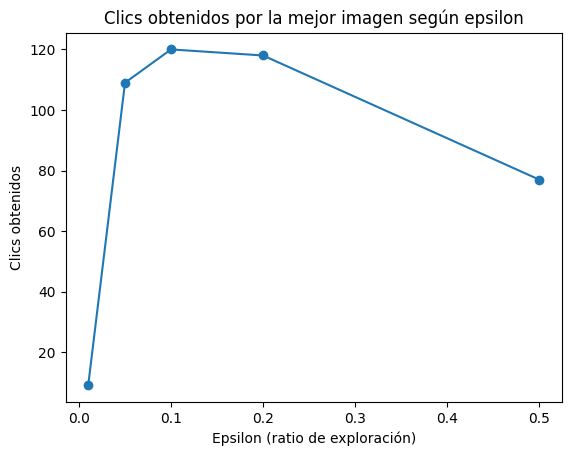

In [7]:
# Visualizar el número de clics por epsilon
plt.plot(epsilons, clicks_per_epsilon, marker='o')
plt.title('Clics obtenidos por la mejor imagen según epsilon')
plt.xlabel('Epsilon (ratio de exploración)')
plt.ylabel('Clics obtenidos')
plt.show()